<a href="https://colab.research.google.com/github/KundeyVishwanath/Spam-ham/blob/main/SPAM_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

LOADING DATASET AND UNDERSTANDING

In [ ]:
x=pd.read_csv("spam.csv",engine="python")
x.head()
x["v1"].value_counts()

ham     4825
spam     745
Name: v1, dtype: int64

In [ ]:
#Assigning predicting(mail) and result(mail_class) variables
mail_class=x["v1"]
mail=x["v2"]

In [ ]:
#converting into numeric data
mail_dict={"spam":"1","ham":"0"}
mail_class=mail_class.map(mail_dict)

In [ ]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(mail,mail_class,test_size=0.1,stratify=mail_class)

VECTORIZING THE TEXT DATA FOR BETTER ACCURACY

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=1,stop_words="english",lowercase="True")
x_train_new=vectorizer.fit_transform(x_train)
x_test_new=vectorizer.transform(x_test)

In [ ]:
#making sure that the data is in integer format
y_train=y_train.astype("int")
y_test=y_test.astype("int")

GRABBING TYPE OF MAIL

In [ ]:
#because we converted result variable into numeric data
def get_type_mail(number):
  if number==0:
    return "ham"
  else:
    return "spam"

LINEAR SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import LinearSVC
clf_csv=LinearSVC()
clf_csv.fit(x_train_new,y_train)

#predicting the testing data
y_pred=clf_csv.predict(x_test_new)

#calculating accuracy
from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_svc_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is a spam mail or a ham mail
new_pred=clf_csv.predict(vectorizer.transform(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's	"]))
get_type_mail(new_pred)

'spam'

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log_reg=LogisticRegression()
clf_log_reg.fit(x_train_new,y_train)

#predicting the testing data
y_pred=clf_log_reg.predict(x_test_new)

#calculating accuracy
from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_log_reg_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is a spam mail or a ham mail
new_pred=clf_log_reg.predict(vectorizer.transform(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's	"]))
get_type_mail(new_pred)


'spam'

K NEAREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train_new,y_train)

#predicting the testing data
y_pred=clf_knn.predict(x_test_new)

#calculating accuracy
from sklearn.metrics import accuracy_score
#multiplying with hundred for converting it interms of percentage(%)
clf_knn_score=accuracy_score(y_test,y_pred)*100

#predicting a random sample,whether it is a spam mail or a ham mail
new_pred=clf_knn.predict(vectorizer.transform(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's	"]))
get_type_mail(new_pred)


'ham'


VISUALIZATION OF ALGORITHMS USED

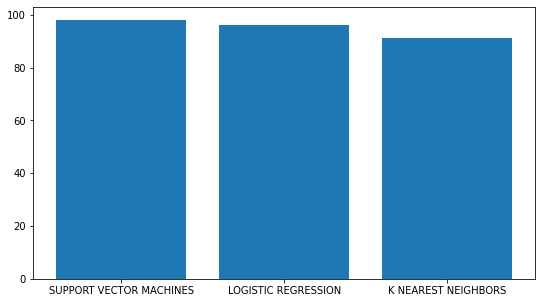

In [ ]:
plt.figure(figsize=(9,5))
models=["SUPPORT VECTOR MACHINES","LOGISTIC REGRESSION","K NEAREST NEIGHBORS"]
numbers=[clf_svc_score,clf_log_reg_score,clf_knn_score]
plt.bar(models,numbers)
plt.show()

From the above bar graph,we can clearly say that SUPPOT VECTOR MACHINES best suits the problem